## 1、手动实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(file, delim = '\t'):
    fr = open('.//data//' + file)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(np.float, line)) for line in stringArr]
    
    return np.mat(datArr)

In [88]:
def pca_transform(mat, topNfeat = 9999999):
    ###数据中心化
    meanVals = np.mean(mat, axis=0)
    meanRemoved = mat - meanVals               
    ###=============================    
    covMat = np.cov(meanRemoved, rowvar = 0)            #计算协方差矩阵， 内部会自动中心。所以直接用mat也可以
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))   #计算特征值和特征向量
    eigValInd = np.argsort(eigVals)                     #排序, 特征值已经变成一维行向量，为了节省空间
    eigValInd = eigValInd[: -(topNfeat +1):-1]          #按排序结果构造索引！！如果topNfeat =2， 那么就是从后往前索引，最大的两个值
    redEigVects = eigVects[:, eigValInd]                #按索引排序特征向量
    lowDDataMat = np.dot(meanRemoved, redEigVects)      #用特征向量降维
    reconMat = (lowDDataMat * redEigVects.T) + meanVals #reconstruction data

    return lowDDataMat, reconMat

In [35]:
def data_plot(data_list):
    data = data_list[0]
    reconMat1 = data_list[1]
    reconMat2 = data_list[2]
    
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(121)
    ax.scatter(data[:, 0].flatten().A, data[:, 1].flatten().A[0], s = 10)
    ax.scatter(reconMat1[:, 0].flatten().A, reconMat1[:, 1].flatten().A, c = 'red')
    
    ax = fig.add_subplot(122)
    ax.scatter(data[:, 0].flatten().A, data[:, 1].flatten().A[0], s = 10)
    ax.scatter(reconMat2[:, 0].flatten().A, reconMat2[:, 1].flatten().A, c = 'red', s=1)
    
    return

In [85]:
data = get_data('testSet.txt')

1降维数组：shape=(1000, 1)
1重构数组：shape=(1000, 2)
2降维数组：shape=(1000, 2)
2重构数组：shape=(1000, 2)


<Figure size 1008x432 with 0 Axes>

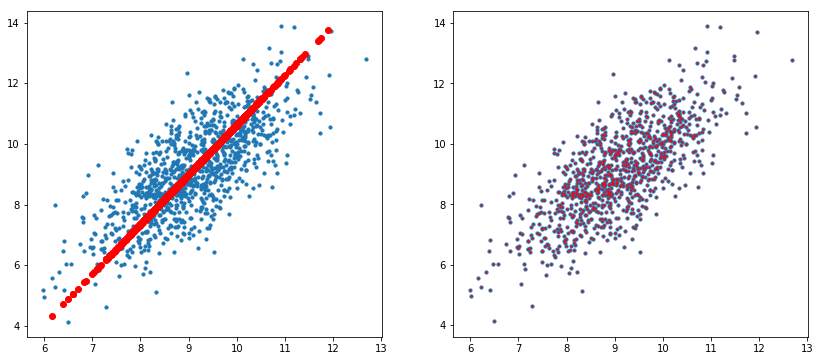

In [37]:
data_list = []
data_list.append(data)
lowDMat, reconMat = pca_transform(data, 1)
data_list.append(reconMat)
print('1降维数组：shape={}'.format(lowDMat.shape))
print('1重构数组：shape={}'.format(reconMat.shape))
fig = plt.figure(figsize=(14,6))
lowDMat, reconMat = pca_transform(data, 2)
print('2降维数组：shape={}'.format(lowDMat.shape))
print('2重构数组：shape={}'.format(reconMat.shape))
data_list.append(reconMat)
data_plot(data_list)

## 2、调包实现并验证

In [11]:
from sklearn.decomposition import PCA
data = get_data('testSet.txt')

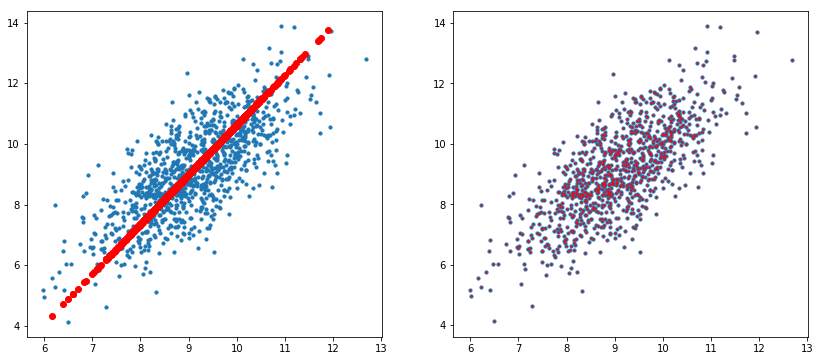

In [39]:
pca = PCA(n_components=1)
low_data = pca.fit_transform(data,)
rec_data = pca.inverse_transform(low_data)
data_list = []
data_list.append(data)
data_list.append(rec_data)

pca2 = PCA(n_components=2)
low_data2 = pca2.fit_transform(data,)
rec_data2 = pca2.inverse_transform(low_data2)
data_list.append(rec_data2)
data_list = [np.mat(i) for i in data_list]

data_plot(data_list)